In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('SVM sample datasheet.csv',names=[
        "Age","Workclass","ID","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"])
data.head()

,Age,Workclass,ID,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.describe()

,Age,ID,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   ID              32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum()

Age               0
Workclass         0
ID                0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#for i in data.columns:
#    data[i]=le.fit_transform(data[i].astype(str))
data['Occupation']=le.fit_transform(data['Occupation'])
data['Target']=le.fit_transform(data['Target'])
data.head()

,Age,Workclass,ID,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,[4,6]]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7775218793182865

<AxesSubplot:>

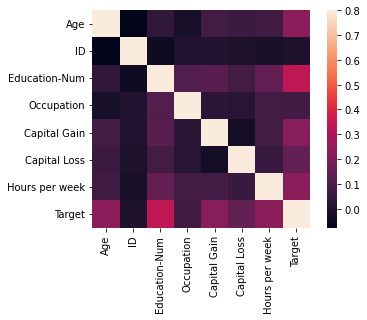

In [9]:
sns.heatmap(data.corr(),vmax=0.8,square=True)

<AxesSubplot:>

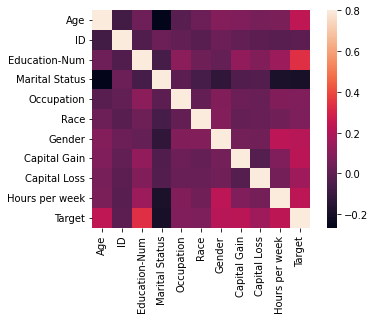

In [10]:
data['Race']=le.fit_transform(data['Race'])
data['Gender']=le.fit_transform(data['Gender'])
data['Marital Status']=le.fit_transform(data['Marital Status'])
sns.heatmap(data.corr(),vmax=0.8,square=True)

In [11]:
data.head()

,Age,Workclass,ID,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,4,1,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,4,Husband,4,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,6,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,2,6,Husband,2,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,2,10,Wife,2,0,0,0,40,Cuba,0


In [12]:
x=data.iloc[:,[4,5,6,8,9]]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model=SVC(kernel='rbf',C=10.0)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8136035621065562

C:\Users\Rajdeep\AppData\Local\Temp/ipykernel_6900/2884868180.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtypes[column] ==np.object:
C:\Users\Rajdeep\AppData\Local\Temp/ipykernel_6900/2884868180.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtypes[column] ==np.object:
C:\Users\Rajdeep\AppData\Local\Temp/ipykernel_6900/2884868180.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, us

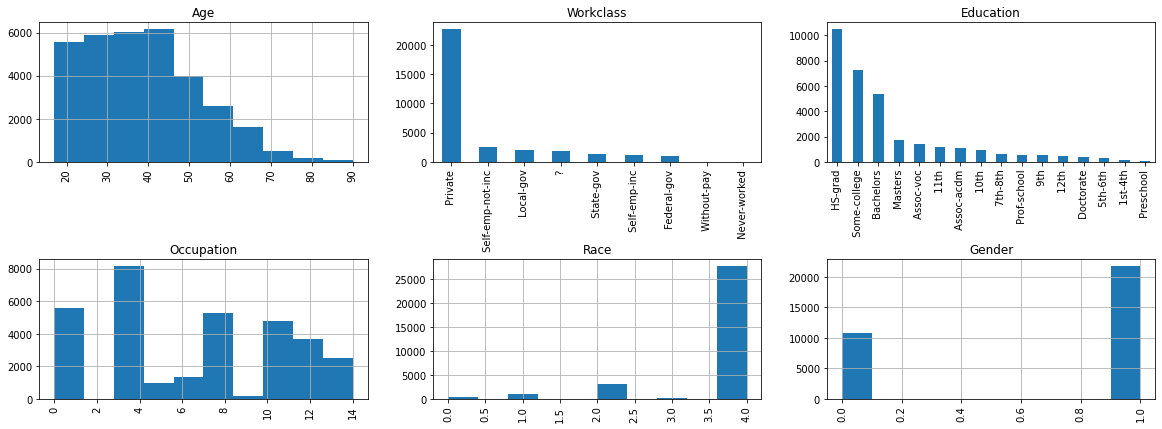

In [13]:
import matplotlib.pyplot as plt
import math
#get_ipython().run_line_magic('matplotlib', 'inline')

fig = plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(data.shape[1])/cols)

for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if data.dtypes[column] ==np.object: 
        data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()